In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
%matplotlib inline




In [2]:
sc.settings.figdir = "fig6"
from matplotlib import rcParams


rcParams["pdf.fonttype"] = 42
rcParams["ps.fonttype"] = 42

In [3]:
pickle_file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'
with open(pickle_file_path, 'rb') as file:
    LESIONAL_GENES_VSHORT5 = pickle.load(file)
    


In [4]:
pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)
    


# F7b

In [5]:
# adata_f6 = adata_lesional[adata_lesional.obs["test13"] ==  'F6: Inflammatory myofibroblast']
# adata_f6.obs["Patient_status2"].value_counts()

In [6]:
PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_f6_nonskin_withskinandwound.h5ad'
adata_f6_all=sc.read_h5ad(PATH)



In [7]:
LESIONAL_GENES_VSHORT5 = {'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
 'F6: Myofibroblast inflammatory': ['CXCL8', 'CXCL5', 'CXCL6', 'CXCL13', 'IL11', 'IL24', 'MMP1', 'MMP3', 'IL7R', 'INHBA', 'CSF3', 'TDO2', 'WWC1', 'CHI3L1', 'STAT4', 'CCL5', 'CCL3', 'CCL11'],
# 'F6(both)+F7': ['ACTA2', 'TAGLN', 'ASPN', 'KIF26B', 'ZNF469', 'RUNX2', 'SULF1', 'ADAM12', 'COL8A1', 'LRRC15', 'CREB3L1', 'CTHRC1', 'CCN4', 'FABP5', 'CDH2']
}

 

In [8]:
status_counts = adata_f6_all.obs['Patient_status2'].value_counts()
categories_to_keep = status_counts[status_counts >= 50].index
adata_i_filtered = adata_f6_all[adata_f6_all.obs['Patient_status2'].isin(categories_to_keep), :]


Patient_status2
RA                                        5296
IBD                                       3045
COVID-19                                  2641
Wound                                     2412
Rhinosinusitis w nasal polyps/rhinitis    1932
Basal cell carcinoma                      1177
Pulmonary fibrosis                         863
Keloid scar                                790
Prurigo nodularis                          729
Acne                                       693
Acral melanoma                             620
Squamous cell carcinoma                    616
Myocardial infarction                      612
Interstitial lung disease                  596
Hidradenitis suppurativa                   339
Psoriasis                                  320
Sarcoidosis                                256
Dupuytren contracture                      194
Cutaneous melanoma                         139
Lung cancer - adenocarcinoma               124
Systemic sclerosis                         1

In [10]:
NEW_ORDER_MIN10CELLS = ['Dupuytren contracture',
 'Keloid scar',
 'Morphoea (pansclerotic)',
 'Systemic sclerosis',
             
 'Non-keloid scar',
              'Sarcoidosis',

 'Granuloma annulare',
            #  'Lupus (DLE)',
              'Eczema',
              'Drug reaction: lichenoid',
# 'Drug reaction: DRESS',
 #'Lupus (SCLE)',
 'Alopecia areata',
 'Erythema migrans',
# 'Neurofibroma',
 'Prurigo nodularis',
      'Psoriasis', 
 'Cutaneous melanoma',        'Acral melanoma',

              'Basal cell carcinoma',
 'Squamous cell carcinoma',

 'Hidradenitis suppurativa',

 'Acne',
 'Wound',
 'IBD',

'Rhinosinusitis w nasal polyps/rhinitis',
            #  'Endometrial',
 #'Chronic rhinitis',
 'Lung cancer - large cell',
 'Interstitial lung disease',
 'Lung cancer - squamous cell',
 'Lung cancer - adenocarcinoma',
 'Pulmonary fibrosis',
 'COVID-19', 'COPD', 'RA', 'Myocardial infarction',
]


NEW_ORDER = ['Dupuytren contracture',
 'Keloid scar',
 #'Morphoea (pansclerotic)',
 'Systemic sclerosis',
             
 #'Non-keloid scar',
              'Sarcoidosis',

 #'Granuloma annulare',
            #  'Lupus (DLE)',
       #       'Eczema',
          #    'Drug reaction: lichenoid',
# 'Drug reaction: DRESS',
 #'Lupus (SCLE)',
 #'Alopecia areata',
# 'Erythema migrans',
# 'Neurofibroma',
 'Prurigo nodularis',
      'Psoriasis', 
 'Cutaneous melanoma',        'Acral melanoma',

              'Basal cell carcinoma',
 'Squamous cell carcinoma',

 'Hidradenitis suppurativa',

 'Acne',
 'Wound',
 'IBD',

'Rhinosinusitis w nasal polyps/rhinitis',
            #  'Endometrial',
 #'Chronic rhinitis',
 'Lung cancer - large cell',
 'Interstitial lung disease',
 'Lung cancer - squamous cell',
 'Lung cancer - adenocarcinoma',
 'Pulmonary fibrosis',
 'COVID-19',# 'COPD',
             'RA', 'Myocardial infarction',
]

for x in NEW_ORDER:
    if x not in adata_i_filtered.obs["Patient_status2"].unique():
        print(x)

In [11]:
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_f6_all.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_f6_all.var_names]
    return LIST


# fig 7c f6

In [12]:
chemok =  [
            "MMP1",      
           "IL7R", 'CXCL5',  "CXCL8",
                                      "CSF3",   'IL11',  
                                          "CCL5",  
                                          "CCL26"
 
                                    ]


/tmp/ipykernel_19664/2541599778.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(lambda x: f"{x} (n={filtered_counts[x]})")
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silenc

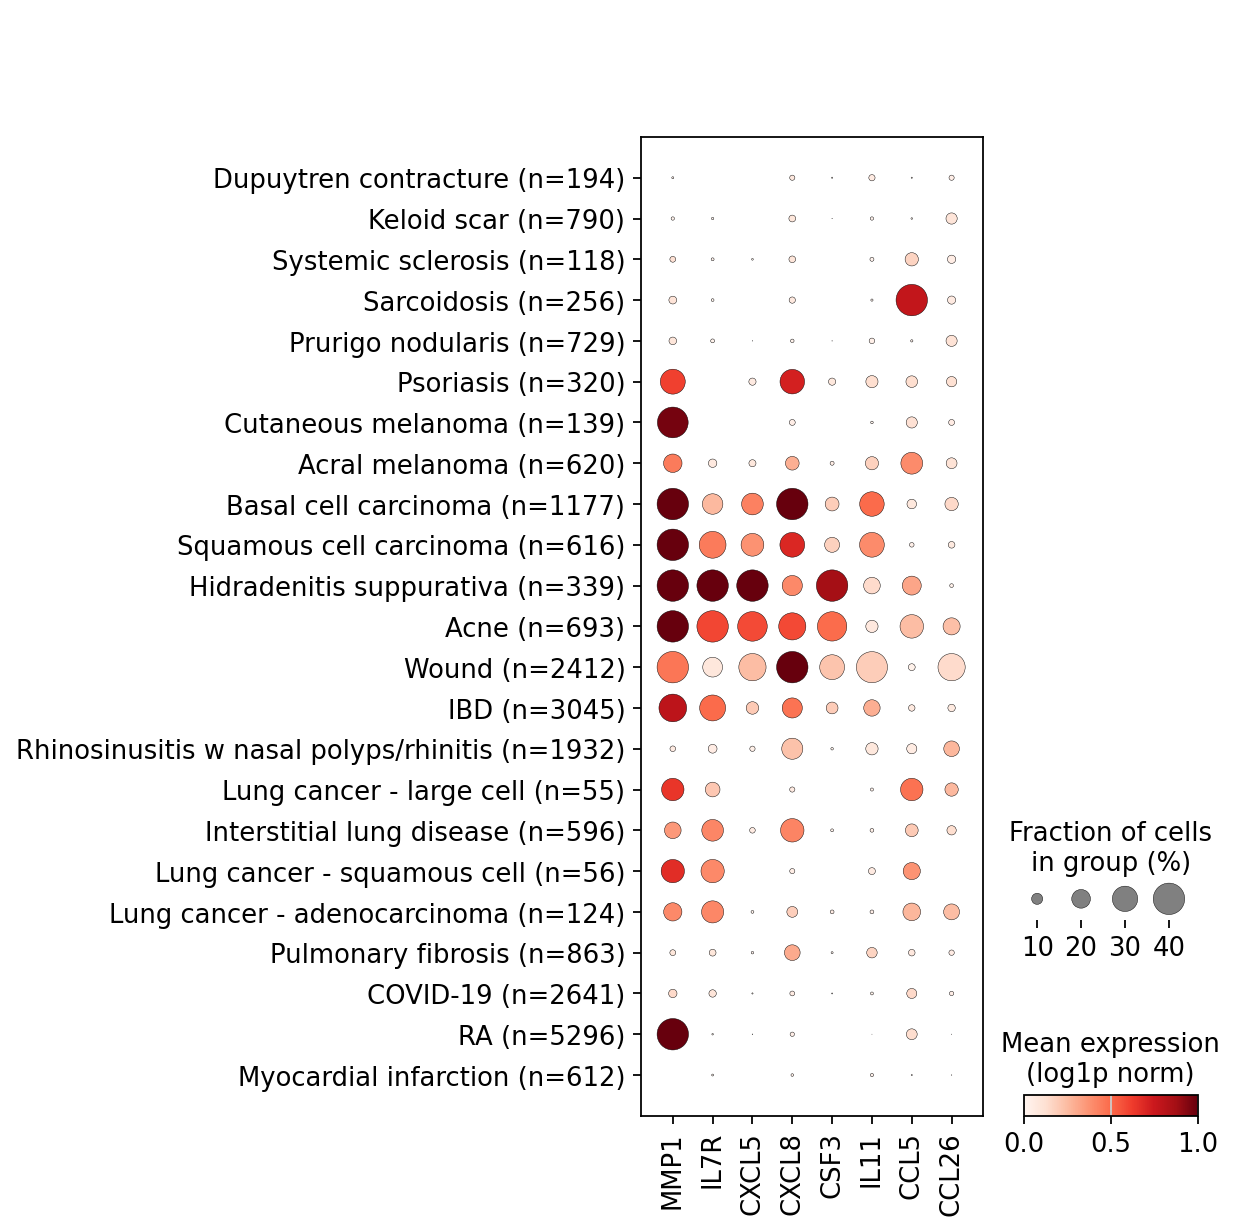

In [13]:
filtered_counts = adata_i_filtered.obs['Patient_status2'].value_counts()
adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(lambda x: f"{x} (n={filtered_counts[x]})")
xtick_order_with_counts = [f"{category} (n={filtered_counts[category]})" for category in NEW_ORDER if category in filtered_counts]

sc.pl.dotplot(
    adata_i_filtered,
    remove_markers(chemok),
    groupby="Patient_status2_with_counts",   
    vmax=1,
    colorbar_title='Mean expression\n(log1p norm)',
    cmap="Reds",
    categories_order=xtick_order_with_counts,   
    dot_max=0.4,
    save="7d_f6.pdf"
)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

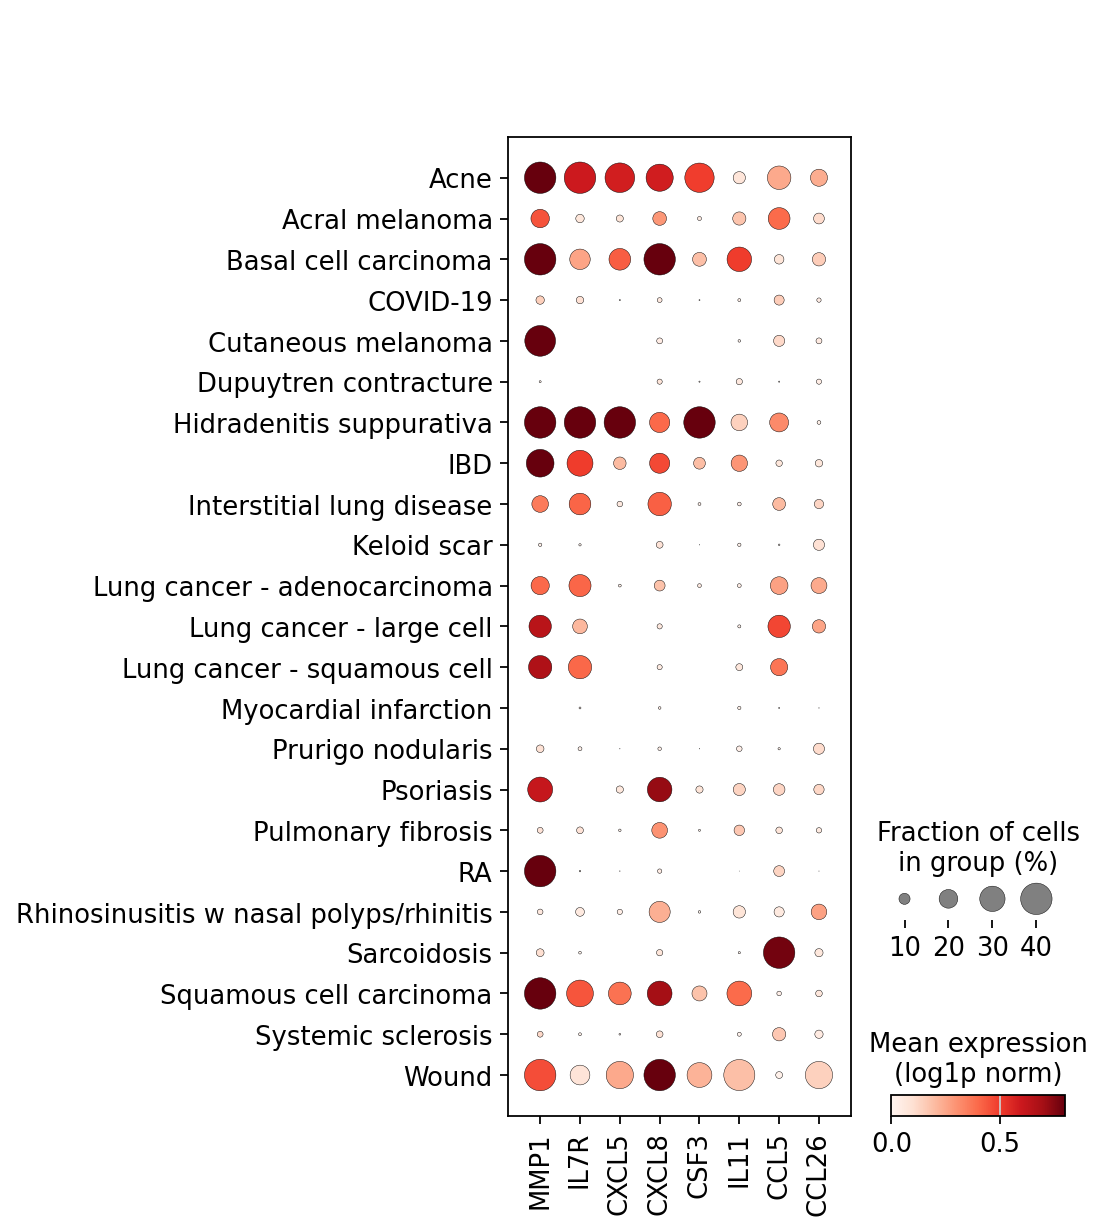

In [14]:
filtered_counts = adata_i_filtered.obs['Patient_status2'].value_counts()
xtick_order_with_counts = [f"{category} (n={filtered_counts[category]})" for category in NEW_ORDER if category in filtered_counts]
sc.pl.dotplot(
    adata_i_filtered,
    remove_markers(chemok),
    groupby="Patient_status2",
    vmax=.8,
    colorbar_title='Mean expression\n(log1p norm)',
    cmap="Reds",
    #categories_order=xtick_order_with_counts,  # Use the new order with counts
    dot_max=0.4,
)

# fig 7b f3

In [15]:
PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_f3_nonskin_withskinandwound.h5ad'
adata_f3_all=sc.read_h5ad(PATH)



In [16]:
counts = adata_i_filtered.obs['Patient_status2'].value_counts()

valid_categories = counts[counts >= 100].index

adata_i_filtered = adata_f3_all[adata_f3_all.obs['Patient_status2'].isin(valid_categories)].copy()

In [18]:
ORDER2= ['Acne',
 'Acral melanoma',
 'Alopecia areata',
 'Basal cell carcinoma',
 'Drug reaction: DRESS',
 'Drug reaction: lichenoid',
 'Eczema',
 'Erythema migrans',
 'Granuloma annulare',
 'Hidradenitis suppurativa',
 'Keloid scar',
 'Lupus (SCLE)',
 'Morphoea (pansclerotic)',
 'Non-keloid scar',
 'Prurigo nodularis',
 'Psoriasis',
 'Sarcoidosis',
 #'Skin',
 'Systemic sclerosis',
 'Wound',
       'IBD',   'COVID-19', 'Interstitial lung disease',

          'Pulmonary fibrosis', 'RA',



]

In [19]:
chemok=['CCL19',"CD74" ,  'CH25H',  "TNFSF13B",  'IL33', "IRF8" ,#"COX4I2", 
       # "IL7",
        "IL15",
        "VCAM1", "HLA-DRA", "HLA-DRB1",# "CCL11","CCL7", "CCL2",
        "ADAMDEC1", "CXCL9"
       ]

In [20]:
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_f6_all.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_f6_all.var_names]
    return LIST



# sc.pl.dotplot(
#     adata_i_filtered,
#     remove_markers(chemok),
#     groupby="Patient_status2",
#     standard_scale="var", colorbar_title='Variance scaled\nexpression',
#     cmap="Reds",
#    categories_order=ORDER2,
#     dot_max=.8,
# )
# sc.pl.dotplot(
#     adata_i_filtered,
#     remove_markers(chemok),
#     groupby="Patient_status2",
#     vmax=1.2,
#     colorbar_title='Mean expression\n(log1p norm)',
#     cmap="Reds",
#    categories_order=ORDER2,
#         dot_max=.8,
#   #  save="6e.pdf"
# )

In [21]:
NEW_ORDER = ['Eczema', 'Drug reaction: lichenoid',  'Drug reaction: DRESS',  'Erythema migrans', 'Alopecia areata', 'Lupus (SCLE)', 
'Granuloma annulare','Morphoea (pansclerotic)',
'Non-keloid scar',
    
    
    'Dupuytren contracture',
 'Keloid scar',
 'Systemic sclerosis',
 'Sarcoidosis',
 'Prurigo nodularis',
 'Psoriasis',
 'Cutaneous melanoma',
 'Acral melanoma',
 'Basal cell carcinoma',
 'Squamous cell carcinoma',
 'Hidradenitis suppurativa',
 'Acne',
 'Wound',
 'IBD',
 'Rhinosinusitis w nasal polyps/rhinitis',
 'Lung cancer - large cell',
 'Interstitial lung disease',
 'Lung cancer - squamous cell',
 'Lung cancer - adenocarcinoma',
 'Pulmonary fibrosis',
 'COVID-19',
 'RA',
 'Myocardial infarction']

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

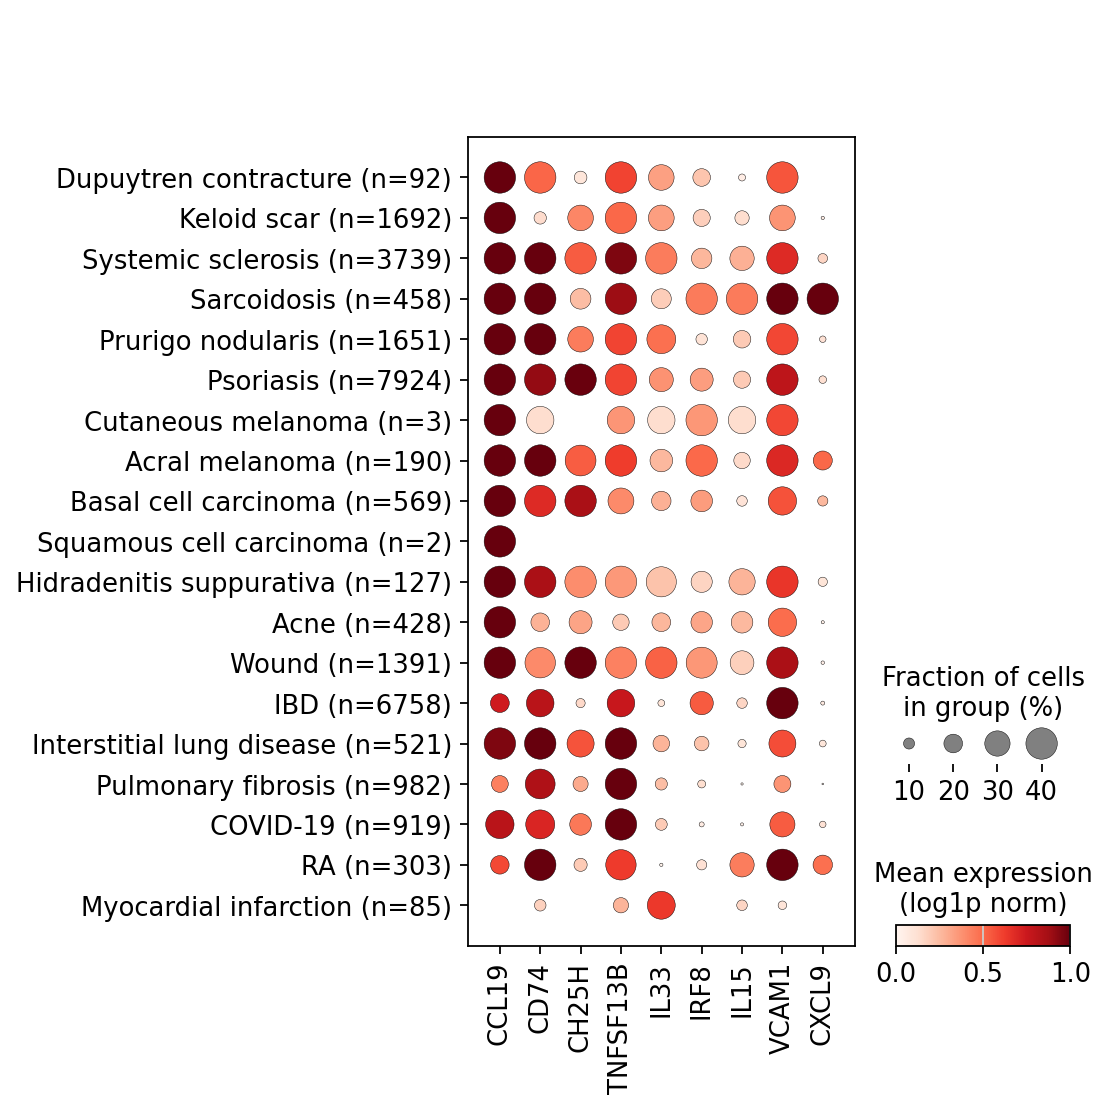

In [22]:
filtered_counts = adata_i_filtered.obs['Patient_status2'].value_counts()

adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(lambda x: f"{x} (n={filtered_counts[x]})")

xtick_order_with_counts = [f"{category} (n={filtered_counts[category]})" for category in NEW_ORDER if category in filtered_counts]

sc.pl.dotplot(
    adata_i_filtered,
    remove_markers(chemok),
    groupby="Patient_status2_with_counts",  
    vmax=1,
    colorbar_title='Mean expression\n(log1p norm)',
    cmap="Reds",
    categories_order=xtick_order_with_counts,  
    save="7B_f6.pdf"
)




In [23]:
sc.logging.print_versions()




-----
anndata     0.10.6
scanpy      1.9.8
-----
PIL                         9.5.0
anyio                       NA
arrow                       1.3.0
asciitree                   NA
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.14.0
backcall                    0.2.0
bottleneck                  1.3.7
certifi                     2023.07.22
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.1.0
cloudpickle                 3.0.0
colorama                    0.4.6
cycler                      0.10.0
cython_runtime              NA
dask                        2024.2.0
dateutil                    2.8.2
debugpy                     1.6.7
decorator                   5.1.1
defusedxml                  0.7.1
dill                        0.3.8
entrypoints                 0.4
exceptiongroup              1.1.1
executing                   1.2.0
fastjsonschema              NA
fon